In [1]:
!pip install --upgrade quantecon

Requirement already up-to-date: quantecon in c:\anaconda\lib\site-packages (0.4.6)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from quantecon import LinearStateSpace
from scipy.stats import norm
import random

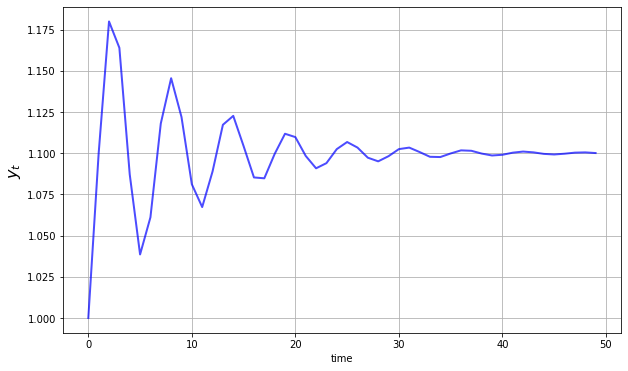

In [3]:
 ϕ_0, ϕ_1, ϕ_2 = 1.1, 0.8, -0.8
A = [[1, 0, 0 ],
[ϕ_0, ϕ_1, ϕ_2],
[0, 1, 0 ]]
C = np.zeros((3, 1))
G = [0, 1, 0]
ar = LinearStateSpace(A, C, G, mu_0=np.ones(3))
x, y = ar.simulate(ts_length=50)
fig, ax = plt.subplots(figsize=(10, 6))
y = y.flatten()
ax.plot(y, 'b-', lw=2, alpha=0.7)
ax.grid()
ax.set_xlabel('time')
ax.set_ylabel('$y_t$', fontsize=16)
plt.show()

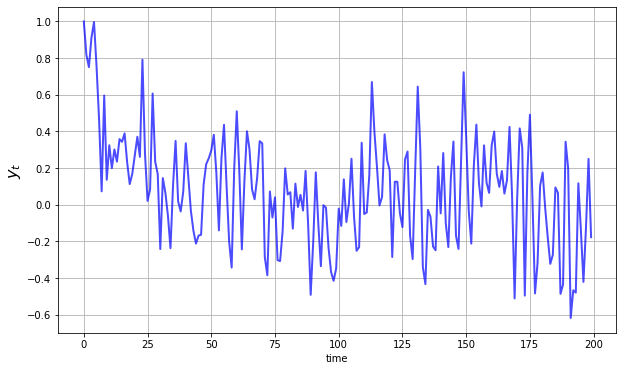

In [4]:
ϕ_1, ϕ_2, ϕ_3, ϕ_4 = 0.5, -0.2, 0, 0.5
σ = 0.2
A = [[ϕ_1, ϕ_2, ϕ_3, ϕ_4],
[1, 0, 0, 0 ],
[0, 1, 0, 0 ],
[0, 0, 1, 0 ]]
C = [[σ],
[0],
[0],
[0]]
G = [1, 0, 0, 0]
ar = LinearStateSpace(A, C, G, mu_0=np.ones(4))
x, y = ar.simulate(ts_length=200)
fig, ax = plt.subplots(figsize=(10, 6))
y = y.flatten()
ax.plot(y, 'b-', lw=2, alpha=0.7)
ax.grid()
ax.set_xlabel('time')
ax.set_ylabel('$y_t$', fontsize=16)
plt.show()

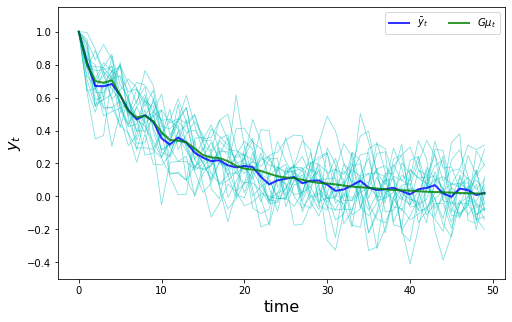

In [5]:
 ϕ_1, ϕ_2, ϕ_3, ϕ_4 = 0.5, -0.2, 0, 0.5
σ = 0.1
A = [[ϕ_1, ϕ_2, ϕ_3, ϕ_4],
[1, 0, 0, 0 ],
[0, 1, 0, 0 ],
[0, 0, 1, 0 ]]
C = [[σ],
[0],
[0],
[0]]
G = [1, 0, 0, 0]
I = 20
T = 50
ar = LinearStateSpace(A, C, G, mu_0=np.ones(4))
ymin, ymax = -0.5, 1.15
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_ylim(ymin, ymax)
ax.set_xlabel('time', fontsize=16)
ax.set_ylabel('$y_t$', fontsize=16)
ensemble_mean = np.zeros(T)
for i in range(I):
    x, y = ar.simulate(ts_length=T)
    y = y.flatten()
    ax.plot(y, 'c-', lw=0.8, alpha=0.5)
    ensemble_mean = ensemble_mean + y
ensemble_mean = ensemble_mean / I
ax.plot(ensemble_mean, color='b', lw=2, alpha=0.8, label='$\\bar y_t$')
m = ar.moment_sequence()
population_means = []
for t in range(T):
    μ_x, μ_y, Σ_x, Σ_y = next(m)
    population_means.append(float(μ_y))
ax.plot(population_means, color='g', lw=2, alpha=0.8, label='$G\mu_t$')
ax.legend(ncol=2)
plt.show()